# Data Scientist Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the first project of the Data Scientist Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# ignore warnings 
import warnings;
warnings.filterwarnings('ignore');

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [2]:
import sys
from platform import python_version
print("Python interpreter: ", sys.executable)
print("Python version: ",python_version())

Python interpreter:  /anaconda3/bin/python
Python version:  3.7.1


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [29]:
# TODO: Total number of records
n_records = data['income'].count()

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = len(data[data['income'] == '>50K'])

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = len(data[data['income'] == '<=50K'])

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = round((n_greater_50k/n_records) * 100, 1)

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.8%


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

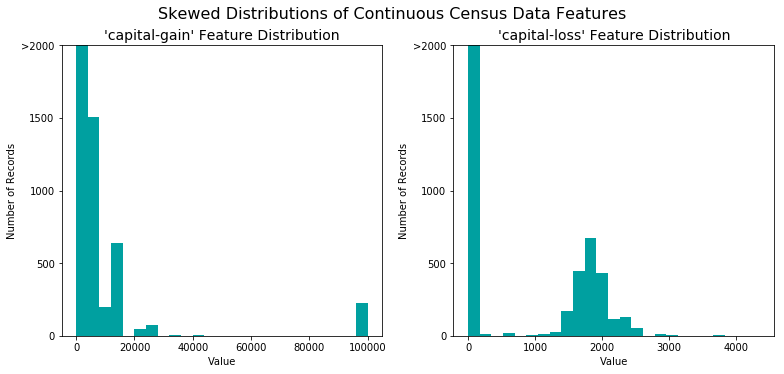

In [30]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

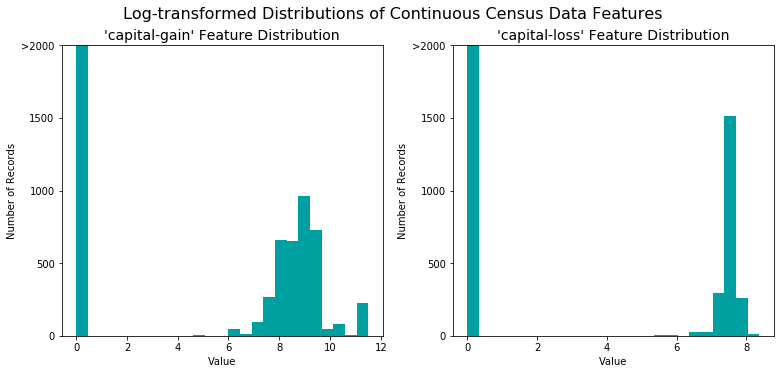

In [31]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [32]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [33]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
obj_features = list(features_log_minmax_transform.select_dtypes(include = ['object']))

features_final = pd.get_dummies(data=features_log_minmax_transform, 
                                columns=obj_features)

# TODO: Encode the 'income_raw' data to numerical values
# income = pd.get_dummies(data=income_raw)  # incorrect as it creates dummies for all categories
income = income_raw.apply(lambda x: 0 if x == '<=50K' else 1)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
#print(encoded)

103 total features after one-hot encoding.


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [34]:
# Import train_test_split

# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split


# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))



Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** Please note ** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

** HINT: ** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [36]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''

TP = sum(income)
FP = len(income) - sum(income) 

TN = 0
FN = 0
# TODO: Calculate accuracy, precision and recall
accuracy = (TP + TN)/(TP + FP)
recall = TP/(TP + FN)
precision = TP/(TP + FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore = (1 + np.power(0.5, 2))*((precision * recall)/((np.power(0.5, 2)) * precision + recall))

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

** HINT: **

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

**Answer: **

#### Logistic regression

In general, logistic regression is an extension of linear regression in that in that the model uses a linear combination of our features to predict the outcome of interest. 

A) Real world application - Logistic regression can be used to answer classification questions. For example, a logistic regression model can be built to explain which voters may vote in the next election by using features such as age, income, political party preference, education, etc. 

B) Strengths; when model performs well - Logistic regression coefficients are relatively more interpretable when compared to other models such as random forests. The coefficients can either be interpreted as "the change in the logit for each unit change in the predictor" or as an odds ratio, depending on how the features are coded and/or transformed.  

C) Weaknesses - Because logistic regression uses a linear combination of features, it can underperform when the features are not linear. Random forests for example can better account for non-linear relationships between features and the outcome of interest.

D) Why good candidate - Logistic regression is used for classification and might be a good fit for this problem in particular because many of the features are continuous. So, many features may have a linear relationship with whether or not an individual makes over $50k. 

resources - https://en.wikipedia.org/wiki/Logistic_regression https://elitedatascience.com/machine-learning-algorithms


#### Adaboost 

In general, adaboost create a number of models that do not perform very well to create a model that performs very well (L7, 1). It does this by subsequently weighing misclassified observations more heavily after each model completes.

A) Real world application - Because the weak learners do not need to be excellent models, this approach might be appropriate when we have a lot of data and we don't have a good sense of the features that may contribute to the outcomes that we're interested in explaining. For example, if we were a new employee at netflix and wanted to create a model that predicted what types of shows a user likes to engage based on features such as age, gender, previous shows watched, and other features that may be new to us, then this approach would work. 

B) Strengths; when model performs well - Adaboost allows us to create a number of models that do not perform very well to create a model that performs very well (L7, 1). Ensemble methods also attempt to optimize variance and bias by either bootstrapping the data or subsetting the features. 

C) Weaknesses - Since ensemble methods use a number of different models, they are not as interpretable as other models with coefficients (such as logistic regression). Processing time is also longer for adaboost models than other models. 

D) Why good candidate - Ensemble methods can be used for classification and regression (L7, 13). The dataset also is not very large with only around 45k rows, so computational time is not a huge issue (though should be taken into consideration). Adaboost also learns from the training data in that it weights misclassified observations more heavility for each subsequent model. If we use decision trees as the base estimator, then we can compare this to a random forest model with similar parameters. This will be interesting as both approaches rely on decision trees in some capacity. 

resources - https://en.wikipedia.org/wiki/AdaBoost


#### Random forest

In general, a random forest model combines a number of decision trees and averages the results of those trees. 

A) Real world application - Random forests can be used for classification and regression problems. Lesson 4 used decision trees as a way to predict the app that individuals would download (pokemon go, whatsapp, or snapchat) based on features such as gender and occupation (L4, 2-4). Because the random forest approach combines a number of decision trees, a random forest could also have been used for this app prediction problem. 

B) Strengths; when model performs well - Random forest is a type of ensemble approach. The ensemble approach is described in the ada boost section above. Random forests in particular help to reduce decision tree variance by using many decision trees on the data. This approach takes the average of the different decision trees to overcome overfitting the training data. 

C) Weaknesses - If not trained approproately, random forests are still susceptible to high variance and can overfit the training, creating a model that is not generalizable outside of the training data. Similar to decision trees, if minimum samples per leaf is too small, we might run the risk of overfitting the data so that the model doesn’t perform well with the testing dataset. However, we can set leaf thresholds to combat this weakness (L4 . 17). 

If categorical variables do not have enough heterogeneity, then models may perform poorly. Ex. We should be careful with the native-country variable in our data because the distribution is heavily weighted toward the US. After creating dummy variables for native-country, the dummies with smaller positive counts, such as Holand-Netherlands and Hungary might not perform as well as United-States (L4, 7).

D) Why good candidate - Random forests can be used for classification problems, which is what we’re addressing in this project. Like decision trees, random forests are relatively simple to understand. Random forests are also relatively simple to understand. For the problem in this project, we have many features (over 100) that we can use for training. 

resources - https://en.wikipedia.org/wiki/Random_forest



### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [37]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import accuracy_score, fbeta_score, precision_score, recall_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
    
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, 0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    precision = precision_score(y_test, predictions_test)
    recall = recall_score(y_test, predictions_test)
    results['f_test'] = (1 + np.power(0.5, 2))*((precision * recall)/((np.power(0.5, 2)) * precision + recall))
        # same as below 
    # results['f_test'] = fbeta_score(y_test['>50K'].values, predictions_test, 0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))

    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

LogisticRegression trained on 361 samples.
LogisticRegression trained on 3617 samples.
LogisticRegression trained on 36177 samples.
RandomForestClassifier trained on 361 samples.
RandomForestClassifier trained on 3617 samples.
RandomForestClassifier trained on 36177 samples.
AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.


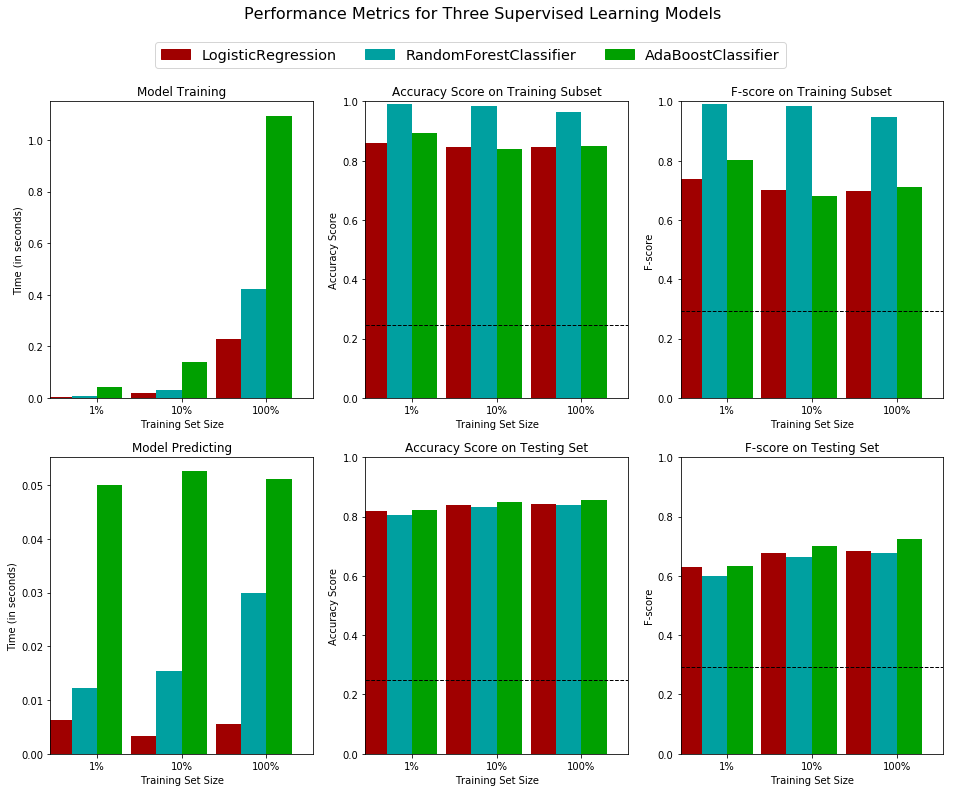

In [38]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression


# TODO: Initialize the three models
clf_A = LogisticRegression(random_state = 2)
clf_B = RandomForestClassifier(random_state = 2)
clf_C = AdaBoostClassifier(random_state=2)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(len(y_train) * 0.1)
samples_1 = int(len(y_train) * 0.01)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

**Answer: **
Note, see cell below for f_scores and accuracy scores for all the training and testing data. 



#### Logistic regression

- Metrics – The logistic regression model performs fairly well with an accuracy score around 0.84 for both the training and testing data and and an f-score of 0.69 and 0.68 for the trainign and testing data, respectively. 

- Prediction/training time – The training and prediction time for this model is the shortest, proving to be the most computationally inexpensive. 

- Algorithm’s suitability for the data – The model performs fairly well and seems well suited for the data. The accuracy and f-score are very similar for the training and testing data, which indicates that that model did not overfit the training data. 


#### Random Forest

- Metrics - The random forest has amazing accuracy and f-scores for the training data with 0.96 and 0.95, respectively, However, the accuracy and f-scores are not similar for the testingin data with 0.84 and 0.67, respectively. This indicates that the random forest overfitted the training data. 

- Prediction/training time - The training and prediction time falls between the logistic regression model and adaboost classifier. Nevertheless, training nad prediction time all are quick at under 1.5 seconds total. 

- Algorithm’s suitability for the data - This model does not sem very well suited for the data. The accuracy and f-score are not very similar, which indicates t that the model overfitted the data and may not be generalizable outside of the training data. 

 

#### Ada Boost with decision trees as the approach to create the week learners

- Metrics – The adaboost model performs fairly well with the an accuracy score of 0.85 and 0.86 for the training and testing data, respectively. The f-scores for the training data and testing data are the best for the three models at 0.71 and 0.72, respecitvely. 

- Prediction/training time – The training and prediction times are the worst of the three models. Nevertheless, the model trains and predict farily quickly at under 1.5 seconds for both combined. 

- Algorithm’s suitability for the data – This model also seems well suited for the data. Similar to the logistic regression model, the accuracy and f-score are very similar for the training and testing data, which indicates that that model did not overfit the training data. In addition, we used a very simple decision tree as the base estimator for this classifier, which illustrates that the base estimator does not need to be complex at all for the ada boost classifier to perform fairly well. 


#### best model 
- Of the three models, I believe the adaboost classifier with the default decision tree baseline estimator was the best because it had the best f-score for both the training and testing data. All three models outperformed the baseline naïve predictor, so comparison with the naïve model is irrelevant. Although the adaboost classifiers had the longest processing time, it still trained and predicted on our data fairly quickly at under 1.5 seconds total. If we had more data to train and predict on, this might be a concern, but I would not consider this a concern with the data in question. 












In [62]:
mods = ['LogisticRegression', 'RandomForestClassifier', 'AdaBoostClassifier']

for mod in mods:
    print("")
    print("{} results: ".format(mod))
    print("f_train all data: ", round(results[mod][2]['f_train'], 4))
    print("f_test all data: ", round(results[mod][2]['f_test'], 4))
    print("acc_train all data: ", round(results[mod][2]['acc_train'], 4))
    print("acc_test all data: ", round(results[mod][2]['acc_test'], 4))



LogisticRegression results: 
f_train all data:  0.6985
f_test all data:  0.6832
acc_train all data:  0.8467
acc_test all data:  0.8419

RandomForestClassifier results: 
f_train all data:  0.9488
f_test all data:  0.6761
acc_train all data:  0.9633
acc_test all data:  0.8397

AdaBoostClassifier results: 
f_train all data:  0.7115
f_test all data:  0.7246
acc_train all data:  0.85
acc_test all data:  0.8576


### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

** HINT: **

When explaining your model, if using external resources please include all citations.

**Answer: ** 

In general, adaboost create a number of models that do not perform very well to create a model that performs very well (L7, 1). It does this by subsequently weighing misclassified observations more heavily after each model completes. In the case of the models above, we used very simple decision tree classifiers with a max depth of 1 as our weak learners. An example of a decision tree classfier with a max depth of 1 would look something like the following: 

- Is the US the person's native country? 
    - If yes, then classify the person as > $50K 
    - If no, then classify the person as <= $50

In the case of the adaboost model above, 50 decision trees at most were executed while subsequently weighing misclassified observations more heavily. The final results of the adaboost model are the average of these <= 50 decision trees. 

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [48]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import make_scorer


# TODO: Initialize the classifier

clf = AdaBoostClassifier(random_state=2)

# clf = RandomForestClassifier(n_estimators = 10, max_depth = 7,
#                              min_samples_leaf = 5, random_state = 2)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'n_estimators':[30, 50, 70]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# # TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=scorer)

# # TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# # Get the estimator
best_clf = grid_fit.best_estimator_

# # Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
# print(best_clf)
best_predictions = best_clf.predict(X_test)


# # Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))





Unoptimized model
------
Accuracy score on testing data: 0.8576
F-score on testing data: 0.7246

Optimized Model
------
Final accuracy score on the testing data: 0.8600
Final F-score on the testing data: 0.7303


In [47]:
print('optimized model parameters: \n')
print(best_clf)
    # RandomForestClassifier(n_estimators = 20, max_depth = 13, min_samples_leaf = 5) 

# original mod
    # RandomForestClassifier(n_estimators = 10, max_depth = 7,
    #                                min_samples_leaf = 5, random_state = 2)


optimized model parameters: 

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=70, random_state=2)


### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Unoptimized Model | Optimized Model | Naive Model (Q1) |  
| :------------: | :---------------: | :-------------: | :-------------:  |
| Accuracy Score |     0.8576        |    0.8600       |     0.2478       |
| F-score        |     0.7246        |    0.7303       |     0.2917       |


**Answer: ** 
The optimized model performs the best. When compared to the unoptimized model, it has a slightly better accuracy and a better f-score. The optimized model parameters are summarized above. Note, we used grid search to tune the n_estimators (number of decision trees estimated). The unoptimized model set this at 50 and the optimized model set this at 70. So, grid search optimized the number of decision trees used in our adaboost classifier 

Note, we used grid search to tune the n_estimators (number of decision trees in the forest), max_depth (max depth of the tree), and min_samples_leaf (min number of samples required to be at a leaf node). The unoptimized model set these parameters at 10, 7, and 5, respectively, while the optimized model set these at 20, 13, and 5 respectively. So, grid search optimized the number of decision trees used in the and max depth of each individual tree in the random forest. When comparing accuracy and f-scores, the optimized model also performs better than the naive model. This should not be surprising as the naive model predicted that every user in the dataset makes over $50k.

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

**Answer:**

1) age - Although the relationship may not be completely linear, I hypothesize that age is an important determinant of income because children cannot make an income, adults from 18-22 are usually in college or working a lower-wage job, adults 22+ will likely have incomes that increase as they age, and retired people may have less income than adults at the peak of their careers. 

2) education_level - I hypothesize that education_level serves as an important determinant of whether someone makes > $50K. I believe education is likely related to age and occupation which, I hypothesize, are both related to the outcome of interest.

3) workclass - Some workclasses listed likely have some heterogeneity in terms of pay. For example, federal-gov employees likely have a wide range in salaries. However, I hypothesize that other values such as without-pay and never-worked will likely be important determinanats of whether someone makes > $50K. 

4) occupation - Some occupations listed likely have some heterogeneity in terms of pay. For example, Armed-Forces is a broad category and those people likely have a range of income. However, there are other occupations, like exec-managerial. I would hypothesize that exec-managerial make more money than non-exec-managerial people. 

5) sex - I hypothesize that this is an important feature because, in the US, women, on average, make around 80 percent that men make. I think that this finding will also be present in the dataset. 

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

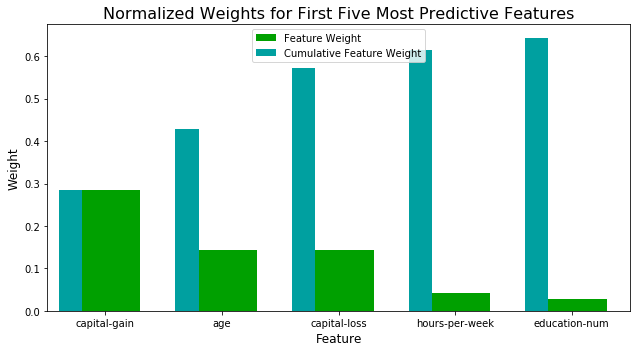

['capital-gain' 'age' 'capital-loss' 'hours-per-week' 'education-num']


In [58]:
# TODO: Import a supervised learning model that has 'feature_importances_'

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
# use optimized model from questions above 

model = best_clf.fit(X_train, y_train)


# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

indices = np.argsort(importances)[::-1]
columns = X_train.columns.values[indices[:5]]
values = importances[indices][:5]


# Plot
vs.feature_plot(importances, X_train, y_train)
print(columns)


### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:**

1) capital-gain - This is a variable I overlooked in my hypotheses. Since capital-gain is the amount of profits from non-income sources such as stocks, bonds, and other assets, then it's very understandable that this is a primary determinant of whether some makes > $50K. If a person is making money in addition to their income, then it likely that the person has a fairly large income. 

2) age - This result supports my hypothesis. Specifically, children do not have an income, 18-22 year old adults may have a small income, 22-65 adults have an income that may increase with age, 65+ adults may have an income that is relatively less than an adult in their prime working years. 

3) capital-loss - Similar to capital-gain, this is another variable I overlooked in my hypotheses. Specifically, any individual who has capital gains or losses probably makes > $50K because they likely have money to invest in stocks, bonds, and other assets. 

4) hours-per-week - Average hours per week worked is related to income; the more an individual works, the more money that individual will bring in. I would hypothesize that hours per week could to be interacted with another variable, like education level or occupation, to offer more explanatory power for our outcomes of interest. For example, individuals who work many hours in a high paying hourly wage industry probably make less than individuals who work the same amount of hours in a lower paying hourly industry.

5) education-num - This result is similar to my hypothesis that education_level would be an important feature. Although I hypothesized education level, perhaps this variable offers more explanatory power because the variable is relatively more granular (i.e. continous vs categorical). 


### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [59]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8600
F-score on testing data: 0.7303

Final Model trained on reduced data
------
Accuracy on testing data: 0.8312
F-score on testing data: 0.6716


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

In [61]:
# compare training times for best_clf when all features are used and when reduced features are used

start = time() 
learner = best_clf.fit(X_train, y_train)
end = time() 

train_time_all_features = end - start

start = time()
clf = (clone(best_clf)).fit(X_train_reduced, y_train)
end = time()

train_time_reduced_features = end - start


# print times
print("Training time when all features are used: {} seconds".format(round(train_time_all_features, 2)))
print("Training time when top 5 features are used: {} seconds".format(round(train_time_reduced_features, 2)))


Training time when all features are used: 1.58 seconds
Training time when top 5 features are used: 0.56 seconds


#### Final Model Results:

|     Metric     | Using All Data  | Using Reduced Data |
| :------------: | :-------------: | :----------------: |
| Accuracy Score |     0.8600      |    0.8312          |    
| F-score        |     0.7303      |    0.6716          | 
| Training time  |     1.55 s      |    0.54 s          |


**Answer:** 
The final model model performs better when using all data vs using the reduced data. The accuracy using the reduced training data is slightly higher than the model using all training data. However, the f-score is higher when using all training data. Limiting the data/features used also reduces the training time over 50%. However, both models take less than two seconds to train, so training time is not a factor here. With the current data, I would move forward with the model using all data as it has a better f-score, meaning that the model performs better using all data vs using reduced data when precision and recall are equally taken into consideration. If there were more data (either rows or features), I would compare training time in the same way and potentially consider moving forward with the model using reduced data. 



> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.